In [2]:
import pandas as pd


In [3]:
dataset=pd.read_csv('/home/moeenuddin/Desktop/all_projects_ML/Remote_Employee_Burnout_Predictor/Remote_Employee_Burnout_Predictor/dataset/raw/new_columns_dataset.csv')

In [4]:
df=dataset

In [5]:
df.head()

,user_id,day_type,work_hours,screen_time_hours,meetings_count,breaks_taken,after_hours_work,app_switches,sleep_hours,task_completion,isolation_index,fatigue_score,burnout_score,burnout_risk,work_hours_7d_avg,fatigue_3d_sum,is_weekend,meetings_7d_avg
0,1,Weekday,7.34,6.09,4,5,1,34,7.98,77.73,3,2.73,9.76,Low,7.34,2.73,False,4.0
1,1,Weekday,7.32,5.82,5,6,0,36,6.27,79.98,3,5.39,24.81,Low,7.33,8.12,False,4.5
2,1,Weekday,7.28,5.28,0,8,0,42,8.23,91.83,3,3.76,11.27,Low,7.31,11.88,False,3.0
3,1,Weekday,8.26,6.01,4,9,0,67,7.54,87.21,3,5.60,19.61,Low,7.55,14.75,False,3.2
4,1,Weekday,7.23,5.98,3,5,0,47,7.02,86.67,4,3.70,20.17,Low,7.49,13.06,False,3.2


In [6]:
import pandas as pd

# 1. Load your dataset (Make sure the file name matches yours)
df = pd.read_csv('/home/moeenuddin/Desktop/all_projects_ML/Remote_Employee_Burnout_Predictor/Remote_Employee_Burnout_Predictor/dataset/raw/new_columns_dataset.csv')

# --- COLUMN 1: Effort Recovery Ratio ---
# Formula: Work Hours / (Sleep Hours + 0.1 buffer)
# The "+ 0.1" prevents a "Divide by Zero" error if someone slept 0 hours.
df['effort_recovery_ratio'] = df['work_hours'] / (df['sleep_hours'] + 0.1)

# --- COLUMN 2: Context Switch Load ---
# Formula: App Switches * Meeting Count
# This multiplies the "Chaos Factors" together.
df['context_switch_load'] = df['app_switches'] * df['meetings_count']

# --- Verify the result ---
print("Columns added successfully!")
print(df[['user_id', 'effort_recovery_ratio', 'context_switch_load']].head())

# (Optional) Save the new dataset
# df.to_csv('final_burnout_dataset.csv', index=False)

Columns added successfully!
   user_id  effort_recovery_ratio  context_switch_load
0        1               0.908416                  136
1        1               1.149137                  180
2        1               0.873950                    0
3        1               1.081152                  268
4        1               1.015449                  141


In [7]:
df.head()   

,user_id,day_type,work_hours,screen_time_hours,meetings_count,breaks_taken,after_hours_work,app_switches,sleep_hours,task_completion,isolation_index,fatigue_score,burnout_score,burnout_risk,work_hours_7d_avg,fatigue_3d_sum,is_weekend,meetings_7d_avg,effort_recovery_ratio,context_switch_load
0,1,Weekday,7.34,6.09,4,5,1,34,7.98,77.73,3,2.73,9.76,Low,7.34,2.73,False,4.0,0.908416,136
1,1,Weekday,7.32,5.82,5,6,0,36,6.27,79.98,3,5.39,24.81,Low,7.33,8.12,False,4.5,1.149137,180
2,1,Weekday,7.28,5.28,0,8,0,42,8.23,91.83,3,3.76,11.27,Low,7.31,11.88,False,3.0,0.873950,0
3,1,Weekday,8.26,6.01,4,9,0,67,7.54,87.21,3,5.60,19.61,Low,7.55,14.75,False,3.2,1.081152,268
4,1,Weekday,7.23,5.98,3,5,0,47,7.02,86.67,4,3.70,20.17,Low,7.49,13.06,False,3.2,1.015449,141


In [8]:
df.isnull().sum()


user_id                  0
day_type                 0
work_hours               0
screen_time_hours        0
meetings_count           0
breaks_taken             0
after_hours_work         0
app_switches             0
sleep_hours              0
task_completion          0
isolation_index          0
fatigue_score            0
burnout_score            0
burnout_risk             0
work_hours_7d_avg        0
fatigue_3d_sum           0
is_weekend               0
meetings_7d_avg          0
effort_recovery_ratio    0
context_switch_load      0
dtype: int64

In [9]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2000 non-null   int64  
 1   day_type               2000 non-null   str    
 2   work_hours             2000 non-null   float64
 3   screen_time_hours      2000 non-null   float64
 4   meetings_count         2000 non-null   int64  
 5   breaks_taken           2000 non-null   int64  
 6   after_hours_work       2000 non-null   int64  
 7   app_switches           2000 non-null   int64  
 8   sleep_hours            2000 non-null   float64
 9   task_completion        2000 non-null   float64
 10  isolation_index        2000 non-null   int64  
 11  fatigue_score          2000 non-null   float64
 12  burnout_score          2000 non-null   float64
 13  burnout_risk           2000 non-null   str    
 14  work_hours_7d_avg      2000 non-null   float64
 15  fatigue_3d_sum 

<Axes: ylabel='work_hours'>

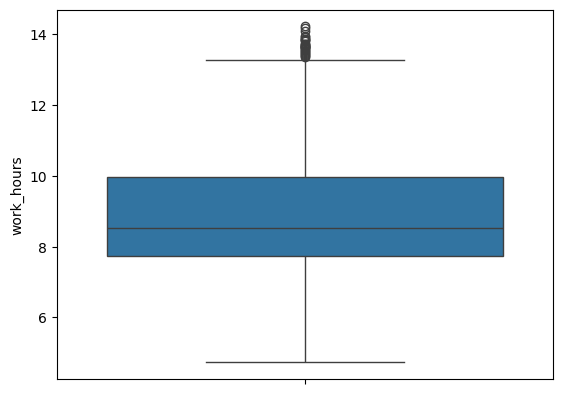

In [10]:
import seaborn as sns
sns.boxplot(df['work_hours'])


In [11]:
df.drop(columns=['user_id'], inplace=True)


In [12]:
df.drop(columns=['burnout_score'], inplace=True)


In [13]:
df['is_weekend'] = df['is_weekend'].astype(int)


In [14]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   day_type               2000 non-null   str    
 1   work_hours             2000 non-null   float64
 2   screen_time_hours      2000 non-null   float64
 3   meetings_count         2000 non-null   int64  
 4   breaks_taken           2000 non-null   int64  
 5   after_hours_work       2000 non-null   int64  
 6   app_switches           2000 non-null   int64  
 7   sleep_hours            2000 non-null   float64
 8   task_completion        2000 non-null   float64
 9   isolation_index        2000 non-null   int64  
 10  fatigue_score          2000 non-null   float64
 11  burnout_risk           2000 non-null   str    
 12  work_hours_7d_avg      2000 non-null   float64
 13  fatigue_3d_sum         2000 non-null   float64
 14  is_weekend             2000 non-null   int64  
 15  meetings_7d_avg

In [15]:
df.head()

,day_type,work_hours,screen_time_hours,meetings_count,breaks_taken,after_hours_work,app_switches,sleep_hours,task_completion,isolation_index,fatigue_score,burnout_risk,work_hours_7d_avg,fatigue_3d_sum,is_weekend,meetings_7d_avg,effort_recovery_ratio,context_switch_load
0,Weekday,7.34,6.09,4,5,1,34,7.98,77.73,3,2.73,Low,7.34,2.73,0,4.0,0.908416,136
1,Weekday,7.32,5.82,5,6,0,36,6.27,79.98,3,5.39,Low,7.33,8.12,0,4.5,1.149137,180
2,Weekday,7.28,5.28,0,8,0,42,8.23,91.83,3,3.76,Low,7.31,11.88,0,3.0,0.873950,0
3,Weekday,8.26,6.01,4,9,0,67,7.54,87.21,3,5.60,Low,7.55,14.75,0,3.2,1.081152,268
4,Weekday,7.23,5.98,3,5,0,47,7.02,86.67,4,3.70,Low,7.49,13.06,0,3.2,1.015449,141


In [16]:
df['day_type'] = df['day_type'].str.strip().str.lower()
df['day_type'] = df['day_type'].map({
    'weekday': 0,
    'weekend': 1
})


In [17]:
df["day_type"].value_counts()

day_type
0    1435
1     565
Name: count, dtype: int64

In [18]:
df["burnout_risk"].value_counts()

burnout_risk
Low       1019
Medium     843
High       138
Name: count, dtype: int64

In [19]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   day_type               2000 non-null   int64  
 1   work_hours             2000 non-null   float64
 2   screen_time_hours      2000 non-null   float64
 3   meetings_count         2000 non-null   int64  
 4   breaks_taken           2000 non-null   int64  
 5   after_hours_work       2000 non-null   int64  
 6   app_switches           2000 non-null   int64  
 7   sleep_hours            2000 non-null   float64
 8   task_completion        2000 non-null   float64
 9   isolation_index        2000 non-null   int64  
 10  fatigue_score          2000 non-null   float64
 11  burnout_risk           2000 non-null   str    
 12  work_hours_7d_avg      2000 non-null   float64
 13  fatigue_3d_sum         2000 non-null   float64
 14  is_weekend             2000 non-null   int64  
 15  meetings_7d_avg

In [20]:
df['burnout_risk'].value_counts()


burnout_risk
Low       1019
Medium     843
High       138
Name: count, dtype: int64

In [21]:
mapping = {
    'Low': 0,
    'Medium': 1,
    'High': 2
}


In [22]:
df['burnout_risk'] = df['burnout_risk'].map(mapping)


In [23]:
import os
import pickle

os.makedirs("../artifacts", exist_ok=True)

with open("../artifacts/burnout_label_mapping.pkl", "wb") as f:
    pickle.dump(mapping, f)


In [24]:
df.head()

,day_type,work_hours,screen_time_hours,meetings_count,breaks_taken,after_hours_work,app_switches,sleep_hours,task_completion,isolation_index,fatigue_score,burnout_risk,work_hours_7d_avg,fatigue_3d_sum,is_weekend,meetings_7d_avg,effort_recovery_ratio,context_switch_load
0,0,7.34,6.09,4,5,1,34,7.98,77.73,3,2.73,0,7.34,2.73,0,4.0,0.908416,136
1,0,7.32,5.82,5,6,0,36,6.27,79.98,3,5.39,0,7.33,8.12,0,4.5,1.149137,180
2,0,7.28,5.28,0,8,0,42,8.23,91.83,3,3.76,0,7.31,11.88,0,3.0,0.873950,0
3,0,8.26,6.01,4,9,0,67,7.54,87.21,3,5.60,0,7.55,14.75,0,3.2,1.081152,268
4,0,7.23,5.98,3,5,0,47,7.02,86.67,4,3.70,0,7.49,13.06,0,3.2,1.015449,141


In [25]:
df.columns

Index(['day_type', 'work_hours', 'screen_time_hours', 'meetings_count',
       'breaks_taken', 'after_hours_work', 'app_switches', 'sleep_hours',
       'task_completion', 'isolation_index', 'fatigue_score', 'burnout_risk',
       'work_hours_7d_avg', 'fatigue_3d_sum', 'is_weekend', 'meetings_7d_avg',
       'effort_recovery_ratio', 'context_switch_load'],
      dtype='str')

In [26]:
df.head()


,day_type,work_hours,screen_time_hours,meetings_count,breaks_taken,after_hours_work,app_switches,sleep_hours,task_completion,isolation_index,fatigue_score,burnout_risk,work_hours_7d_avg,fatigue_3d_sum,is_weekend,meetings_7d_avg,effort_recovery_ratio,context_switch_load
0,0,7.34,6.09,4,5,1,34,7.98,77.73,3,2.73,0,7.34,2.73,0,4.0,0.908416,136
1,0,7.32,5.82,5,6,0,36,6.27,79.98,3,5.39,0,7.33,8.12,0,4.5,1.149137,180
2,0,7.28,5.28,0,8,0,42,8.23,91.83,3,3.76,0,7.31,11.88,0,3.0,0.873950,0
3,0,8.26,6.01,4,9,0,67,7.54,87.21,3,5.60,0,7.55,14.75,0,3.2,1.081152,268
4,0,7.23,5.98,3,5,0,47,7.02,86.67,4,3.70,0,7.49,13.06,0,3.2,1.015449,141


In [27]:
import os

# Go one level up from notebooks
PROJECT_ROOT = os.path.dirname(os.getcwd())

# Create dataset/processed folder
processed_path = os.path.join(PROJECT_ROOT, "dataset", "processed")
os.makedirs(processed_path, exist_ok=True)

In [28]:
file_path = os.path.join(processed_path, "burnout_processed.csv")

df.to_csv(file_path, index=False)

In [29]:
df.columns

Index(['day_type', 'work_hours', 'screen_time_hours', 'meetings_count',
       'breaks_taken', 'after_hours_work', 'app_switches', 'sleep_hours',
       'task_completion', 'isolation_index', 'fatigue_score', 'burnout_risk',
       'work_hours_7d_avg', 'fatigue_3d_sum', 'is_weekend', 'meetings_7d_avg',
       'effort_recovery_ratio', 'context_switch_load'],
      dtype='str')